# Exercises (DIY) - Part 1

In this exercise we try to merge information from two data sources that share a common key. 

The first file passengerData.csv contains information of 891 passengers on a ship. 

The second file ticketPrices.xlsx contains just the look up values for the ticket prices for the trip in British Pounds. 

The two files share a common column called TicketType that can be used to link them. Try doing the following tasks:

1. Download the two files and load them into pandas data frames. Hint: have a look at this page and do not forget to parse your excel sheet into a data frame.

In [6]:
# Import pandas library
import pandas as pd

In [4]:
file1 = pd.read_csv("ticketPrices.csv")
file1.head()

,TicketType,Fare
0,1,33
1,2,56
2,3,77
3,4,22
4,5,14


In [7]:
file2 = pd.read_csv("passengerData.csv")
file2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,TicketType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,5


2. Merge the two files based on the column they share.

In [13]:
# merged_files = pd.concat([file1, file2], axis=1, join='inner', join_axes=[file1.TicketType])
result = pd.merge(file1, file2, on=['TicketType', 'TicketType'])
result

,TicketType,Fare,PassengerId,Survived,Pclass,Name,Sex,Age
0,1,33,1,0,3,"Braund, Mr. Owen Harris",male,22.00
1,1,33,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00
2,1,33,17,0,3,"Rice, Master. Eugene",male,2.00
3,1,33,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00
4,1,33,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN
5,1,33,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.00
6,1,33,49,0,3,"Samaan, Mr. Youssef",male,NaN
7,1,33,57,1,2,"Rugg, Miss. Emily",female,21.00
8,1,33,65,0,1,"Stewart, Mr. Albert A",male,NaN
9,1,33,73,0,2,"Hood, Mr. Ambrose Jr",male,21.00


3. Display the name of the oldest passengers (hint: make use of variables to save some intermediate values).

In [24]:

# data.groupby(['Country','Place'])['Value'].max()
max_age = result['Age'].max()
result.loc[result['Age'] == max_age, ['Name']]


,Name
747,"Barkworth, Mr. Algernon Henry Wilson"


4. Plot the data on a scatter plot that shows the Age vs. Ticket Prices

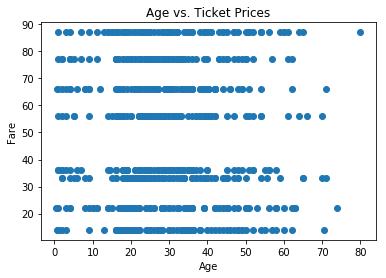

In [30]:
import matplotlib.pyplot as plt
plt.scatter(result.Age, result.Fare)
plt.title("Age vs. Ticket Prices")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

5. Plot only the data that shows female passengers aged 40 to 50 and who paid more than or equal to 40.

In [38]:
result.loc[(result['Sex'] == 'female') & (result['Age'] >= 40) & (result['Age'] <= 50) & (result['Fare'] >= 40), ['Name', 'Sex', 'Age', 'Fare'] ]

ValueError: Cannot index with multidimensional key